**ML_1**

This is our take on diabetes binary classification.
The dataset is from "[LinkHere](https://www.kaggle.com/datasets/priyamchoksi/100000-diabetes-clinical-dataset)".

* The dataset have 100000 instaces. With 16 attribues.

* ['year', 'gender', 'age', 'location','race:AfricanAmerican','race:Asian','race:Caucasian', 'race:Hispanic', 'race:Other','hypertension','heart_disease', 'smoking_history', 'bmi',
'hbA1c_level', 'blood_glucose_level', 'diabetes'] Which 5 of them are race-attribute.

Let start by importing our dataset and library.





In [ ]:
# Install necessary libraries (if needed)
!pip install gdown
!pip install pandas seaborn matplotlib scikit-learn

# Importing necessary libraries
import pandas as pd
import gdown
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Google Sheet file ID extracted from the URL
file_id = '1lc8H8QxkBEukQQlCF4NFaib1EXe29tKj'

# Construct the download URL
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the file
gdown.download(url, '/content/spreadsheet.csv', quiet=False)

# Load the CSV file
df = pd.read_csv('/content/spreadsheet.csv')

# Display the first few rows
df.head()
dfsave1 = df.copy()

Downloading...
From: https://drive.google.com/uc?export=download&id=1lc8H8QxkBEukQQlCF4NFaib1EXe29tKj
To: /content/spreadsheet.csv
100%|██████████| 6.14M/6.14M [00:00<00:00, 51.2MB/s]


In [ ]:
print(df.describe())
print(df.shape)
print(df.columns)
print(df.head())

                year            age  race:AfricanAmerican     race:Asian  \
count  100000.000000  100000.000000         100000.000000  100000.000000   
mean     2018.360820      41.885856              0.202230       0.200150   
std         1.345239      22.516840              0.401665       0.400114   
min      2015.000000       0.080000              0.000000       0.000000   
25%      2019.000000      24.000000              0.000000       0.000000   
50%      2019.000000      43.000000              0.000000       0.000000   
75%      2019.000000      60.000000              0.000000       0.000000   
max      2022.000000      80.000000              1.000000       1.000000   

       race:Caucasian  race:Hispanic     race:Other  hypertension  \
count   100000.000000   100000.00000  100000.000000  100000.00000   
mean         0.198760        0.19888       0.199980       0.07485   
std          0.399069        0.39916       0.399987       0.26315   
min          0.000000        0.00000   

**ML_CheckPoint1.5**
Lets look at the type of attribute. Then see the Correlation metric.

In [ ]:
def check_column_types(df):
    column_types = {
        'Numerical': [],
        'Categorical': []
    }

    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            column_types['Numerical'].append(col)
        else:
            column_types['Categorical'].append(col)

    return column_types

# Show the result
column_types = check_column_types(df)
print("Numerical Columns:", column_types['Numerical'])
print("Categorical Columns:", column_types['Categorical'])

Numerical Columns: ['year', 'age', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes']
Categorical Columns: ['gender', 'location', 'smoking_history']


In [ ]:
# Function to get descriptive statistics for categorical columns
def describe_categorical(df):
    # Filter categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns
    # Use describe on categorical columns
    return df[categorical_columns].describe()

# Show the result
categorical_description = describe_categorical(df)
print(categorical_description)

        gender  location smoking_history
count   100000    100000          100000
unique       3        55               6
top     Female  Kentucky         No Info
freq     58552      2038           35816


As some of the categorical columns can't be process with
.corr() we can simply drop it.

Index(['year', 'age', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian',
       'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


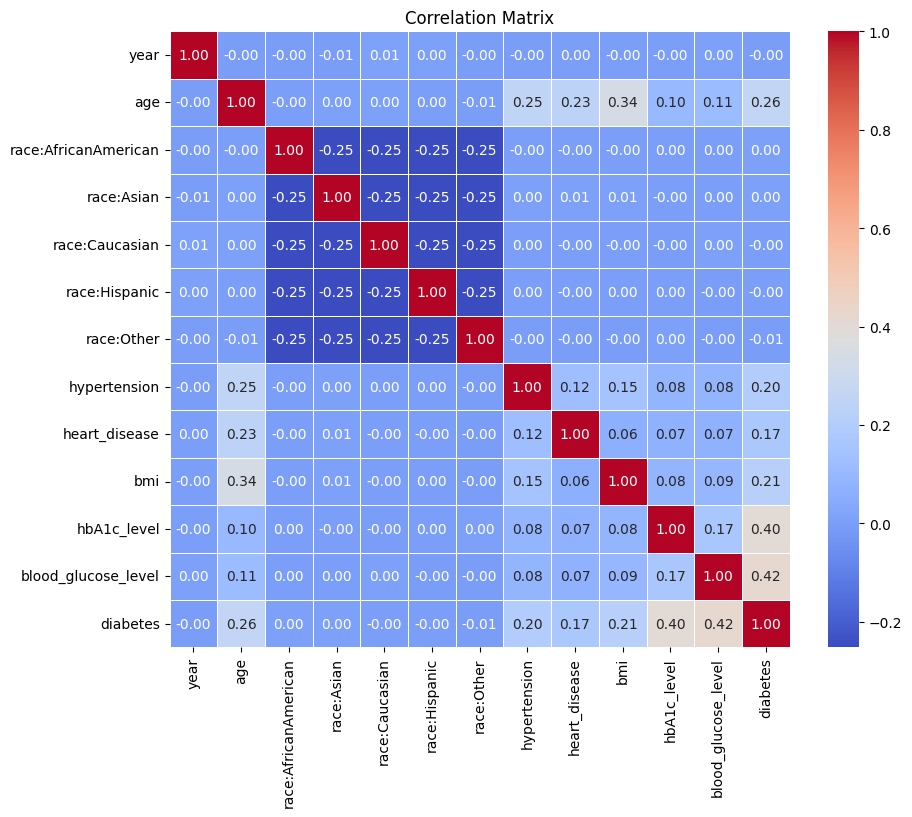

In [ ]:
# Updated list of columns to drop (Label = 1)
cols_to_drop = [
    'gender','location','smoking_history'
]

# Drop them from your DataFrame
dfclear = df.drop(columns=cols_to_drop)

correlation_matrix = dfclear.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)



# Set title and show the plot
print(dfclear.columns)
plt.title('Correlation Matrix')
plt.show()


We can see that Race has little to no relation. To "Diabetes" or to any other attribue except race. We can also encode the 3 catagoricals attribute to numerical attribute.



*   The first two we will use One-Hot-Encoding.
As there isn't a lot of the unique value.
*   The third we will use factorization.




In [ ]:
df_encoded = pd.get_dummies(df, columns=['gender'])
df_encoded = pd.get_dummies(df_encoded, columns=['smoking_history'])
df_encoded['location'], location_labels = pd.factorize(df_encoded['location'])
print(df_encoded.columns)

Index(['year', 'age', 'location', 'race:AfricanAmerican', 'race:Asian',
       'race:Caucasian', 'race:Hispanic', 'race:Other', 'hypertension',
       'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level',
       'diabetes', 'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')


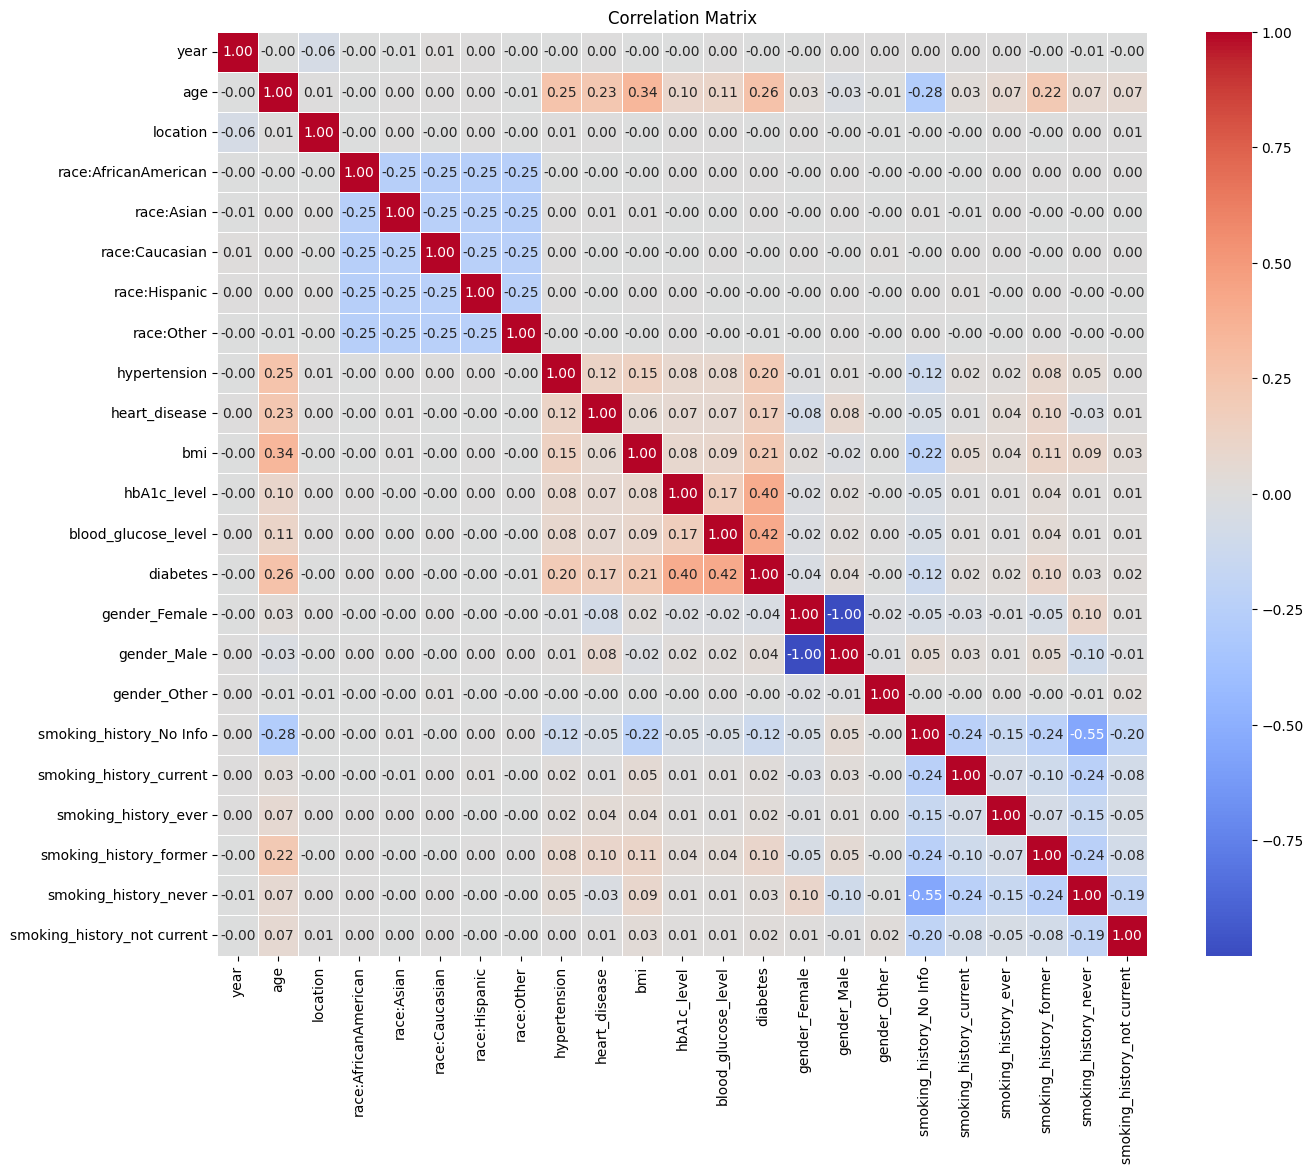

In [ ]:
correlation_matrix = df_encoded.corr()
# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set title and show the plot
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Get the correlation values of the "diabetes" column
diabetes_corr = correlation_matrix['diabetes']

# Convert the Series to a list of tuples and sort it by absolute values
sorted_arr = sorted(diabetes_corr.items(), key=lambda x: abs(x[1]), reverse=True)

# Convert the sorted list back to a pandas Series for display
sorted_diabetes_corr = pd.Series(dict(sorted_arr))

# Display the sorted correlations
print("Absolute Correlation of 'diabetes' with other columns (Descending Order):")
print(sorted_diabetes_corr)

Absolute Correlation of 'diabetes' with other columns (Descending Order):
diabetes                       1.000000
blood_glucose_level            0.419558
hbA1c_level                    0.400660
age                            0.258008
bmi                            0.214357
hypertension                   0.197823
heart_disease                  0.171727
smoking_history_No Info       -0.118939
smoking_history_former         0.097917
gender_Male                    0.037666
gender_Female                 -0.037553
smoking_history_never          0.027267
smoking_history_ever           0.024080
smoking_history_not current    0.020734
smoking_history_current        0.019606
race:Other                    -0.005095
race:AfricanAmerican           0.004378
gender_Other                  -0.004090
race:Asian                     0.003739
year                          -0.003464
race:Caucasian                -0.001749
race:Hispanic                 -0.001301
location                      -0.000130
dtype:

From what we can see. Location, Race and year(Which is the year the data is collected in). Have little to no relation to diabetes.Where as gender and smoking have some. Therefore, we could, in theory, remove these columns from our dataset to simplify the model without significantly affecting the predictions. gender_Other also have low correlation, but the other gender are included so also make sense to not delete gender_other

In [ ]:
# Updated list of columns to drop (Label = 7)
cols_to_drop = [
    'race:Other', 'race:AfricanAmerican','race:Asian',
    'year', 'race:Caucasian', 'race:Hispanic', 'location'
]

# Drop them from your DataFrame
df = df.drop(columns=cols_to_drop)

# Check the result
print(df.columns)
print(df.head())
dfsave2 = df.copy()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  32.0             0              0           never  27.32   
1  Female  29.0             0              0           never  19.95   
2    Male  18.0             0              0           never  23.76   
3    Male  41.0             0              0           never  27.32   
4  Female  52.0             0              0           never  23.75   

   hbA1c_level  blood_glucose_level  diabetes  
0          5.0                  100         0  
1          5.0                   90         0  
2          4.8                  160         0  
3          4.0                  159         0  
4          6.5                   90         0  


**CHECKPOINT2**

Next let see the distribution of the target attribute.

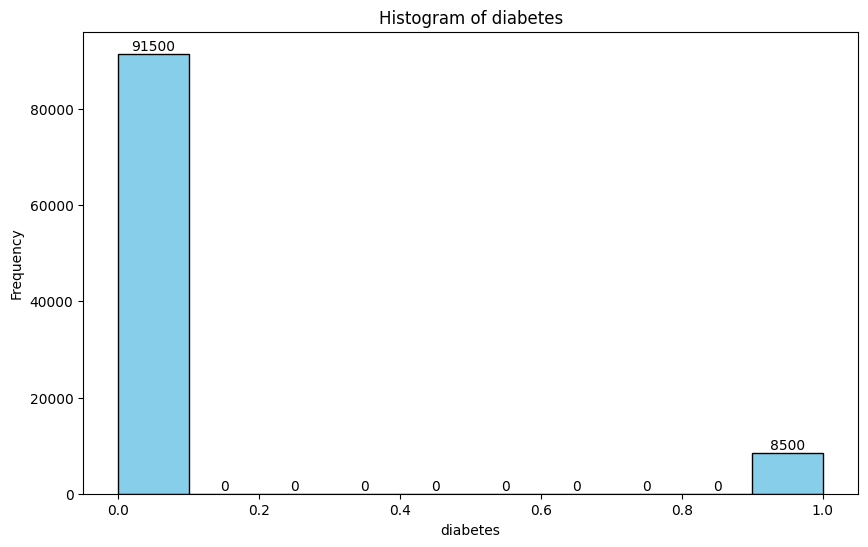

In [ ]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the plot
n, bins, patches = plt.hist(df['diabetes'], bins=10, color='skyblue', edgecolor='black') # Customize the number of bins

plt.title('Histogram of diabetes')
plt.xlabel('diabetes')
plt.ylabel('Frequency')

# Annotate the frequency on top of each bar
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i], str(int(n[i])),
             ha='center', va='bottom', fontsize=10)  # Adjust ha and va for proper positioning

plt.show()


As you see the people who has diabetes are only **0.85** of all dataset mean the distrbution of our target label are not equal. but that doesn't mean we can't build this model. There are many way to circumvent this problem with multiple technique.


*   Using F1-score,Recall,Precision instead of only focusing on Accuracy in Evaluation metrics.
*   Undersampling the Majority class (might loss of information)
*   Entering class weight in model. To have missing the Minority class plenalized more

We'll be starting from the most basic method. By using the same sample, F1-score, And entering the weighted in model.


In [ ]:
print(df.columns)
print(df.describe())
print(df.shape)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         hbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136      

This next code prepares a dataset for machine learning by first splitting it into features and target variables.

In [ ]:
# Example DataFrame (replace with your actual encoded dataframe)
df_encoded = dfsave2.copy()  # Replace this with your actual DataFrame

# Split the data into features (X) and target (y)
X = df_encoded.drop(columns=['diabetes'])
y = df_encoded['diabetes']

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing for categorical data (One-Hot Encoding)
X = pd.get_dummies(X, columns=categorical_columns)

# Preprocessing for numerical data (Standard Scaling)
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class weights: {class_weight_dict}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Class weights: {0: np.float64(0.546448087431694), 1: np.float64(5.882352941176471)}


This next code trains and evaluates a Logistic Regression model using a dataset with preprocessed features.

In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression(class_weight=class_weight_dict)

# Fit model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model (Accuracy, Precision, Recall)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display the results
print(f"Accuracy for Logistic Regression: {accuracy:.4f}")
print(f"Precision for Logistic Regression: {precision:.4f}")
print(f"Recall for Logistic Regression: {recall:.4f}")

aLR = accuracy
pLR = precision
rLR = recall


# Extract coefficients for Logistic Regression
feature_importance = log_reg.coef_[0]
top_features = sorted(zip(X.columns, feature_importance), key=lambda x: abs(x[1]), reverse=True)

# Print top weighted columns (coefficients)
print("Top Weighted Columns (Logistic Regression):")
for feature, importance in top_features[:10]:  # Adjust number of top features to display
    print(f"{feature}: {importance:.4f}")

print("="*50)


Accuracy for Logistic Regression: 0.8893
Precision for Logistic Regression: 0.4267
Recall for Logistic Regression: 0.8714
Top Weighted Columns (Logistic Regression):
hbA1c_level: 2.3201
blood_glucose_level: 1.2760
age: 1.0940
gender_Female: -0.9367
smoking_history_No Info: -0.7898
gender_Male: -0.6604
bmi: 0.6527
smoking_history_not current: -0.2487
smoking_history_never: -0.2254
hypertension: 0.2058


This next code trains and evaluates a K-Nearest Neighbors (KNN) model.

In [ ]:
# KNN Model
knn = KNeighborsClassifier()

# Fit model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate model (Accuracy, Precision, Recall)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display the results
print(f"Accuracy for KNN: {accuracy:.4f}")
print(f"Precision for KNN: {precision:.4f}")
print(f"Recall for KNN: {recall:.4f}")

aKNN = accuracy
pKNN= precision
rKNN = recall

print("="*50)


Accuracy for KNN: 0.9605
Precision for KNN: 0.8939
Recall for KNN: 0.6083


In [ ]:
# Naive Bayes Model
naive_bayes = GaussianNB()

# Fit model
naive_bayes.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes.predict(X_test)

# Evaluate model (Accuracy, Precision, Recall)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display the results
print(f"Accuracy for Naive Bayes: {accuracy:.4f}")
print(f"Precision for Naive Bayes: {precision:.4f}")
print(f"Recall for Naive Bayes: {recall:.4f}")

aNB = accuracy
pNB = precision
rNB = recall

print("="*50)

Accuracy for Naive Bayes: 0.6443
Precision for Naive Bayes: 0.1879
Recall for Naive Bayes: 0.9565


This code trains and evaluates a Naive Bayes (GaussianNB) model.

This next code trains and evaluates a Decision Tree model.

In [ ]:
# Decision Tree Model
decision_tree = DecisionTreeClassifier(class_weight=class_weight_dict)

# Fit model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate model (Accuracy, Precision, Recall)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display the results
print(f"Accuracy for Decision Tree: {accuracy:.4f}")
print(f"Precision for Decision Tree: {precision:.4f}")
print(f"Recall for Decision Tree: {recall:.4f}")

aDT = accuracy
pDT = precision
rDT = recall

# Extract feature importance for Decision Tree
feature_importance = decision_tree.feature_importances_
top_features = sorted(zip(X.columns, feature_importance), key=lambda x: abs(x[1]), reverse=True)

# Print top weighted columns (Decision Tree)
print("Top Weighted Columns (Decision Tree):")
for feature, importance in top_features[:10]:  # Adjust number of top features to display
    print(f"{feature}: {importance:.4f}")

print("="*50)


Accuracy for Decision Tree: 0.9532
Precision for Decision Tree: 0.7214
Recall for Decision Tree: 0.7328
Top Weighted Columns (Decision Tree):
hbA1c_level: 0.4110
blood_glucose_level: 0.3035
age: 0.1271
bmi: 0.1081
hypertension: 0.0069
smoking_history_never: 0.0061
smoking_history_No Info: 0.0058
heart_disease: 0.0058
smoking_history_not current: 0.0054
smoking_history_former: 0.0053


This next code trains and evaluates a Random Forest model.

In [ ]:
# Random Forest Model
random_forest = RandomForestClassifier(class_weight=class_weight_dict)

# Fit model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate model (Accuracy, Precision, Recall)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display the results
print(f"Accuracy for Random Forest: {accuracy:.4f}")
print(f"Precision for Random Forest: {precision:.4f}")
print(f"Recall for Random Forest: {recall:.4f}")

aRF = accuracy
pRF = precision
rRF = recall

# Extract feature importance for Random Forest
feature_importance = random_forest.feature_importances_
top_features = sorted(zip(X.columns, feature_importance), key=lambda x: abs(x[1]), reverse=True)

# Print top weighted columns (Random Forest)
print("Top Weighted Columns (Random Forest):")
for feature, importance in top_features[:10]:  # Adjust number of top features to display
    print(f"{feature}: {importance:.4f}")

print("="*50)

Accuracy for Random Forest: 0.9689
Precision for Random Forest: 0.9314
Recall for Random Forest: 0.6853
Top Weighted Columns (Random Forest):
hbA1c_level: 0.3414
blood_glucose_level: 0.2786
age: 0.1731
bmi: 0.1323
hypertension: 0.0254
heart_disease: 0.0138
smoking_history_No Info: 0.0137
smoking_history_former: 0.0056
smoking_history_never: 0.0034
gender_Male: 0.0030


This next code trains and evaluates a Support Vector Machine (SVM) model with a linear kernel.
**This take a lot longer runtime than other model**

In [ ]:
# SVM Model
svm = SVC(kernel='linear', class_weight=class_weight_dict)

# Fit model
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate model (Accuracy, Precision, Recall)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display the results
print(f"Accuracy for SVM: {accuracy:.4f}")
print(f"Precision for SVM: {precision:.4f}")
print(f"Recall for SVM: {recall:.4f}")

aSVM = accuracy
pSVM = precision
rSVM = recall

# Extract coefficients for SVM
feature_importance = svm.coef_[0]
top_features = sorted(zip(X.columns, feature_importance), key=lambda x: abs(x[1]), reverse=True)

# Print top weighted columns (SVM)
print("Top Weighted Columns (SVM):")
for feature, importance in top_features[:10]:  # Adjust number of top features to display
    print(f"{feature}: {importance:.4f}")

print("="*50)


Accuracy for SVM: 0.8882
Precision for SVM: 0.4244
Recall for SVM: 0.8767
Top Weighted Columns (SVM):
hbA1c_level: 1.4876
blood_glucose_level: 0.8382
age: 0.7921
gender_Other: -0.5464
bmi: 0.4827
smoking_history_No Info: -0.3879
gender_Male: 0.3709
gender_Female: 0.1756
hypertension: 0.1639
smoking_history_former: 0.1447


**Evaluation**

Let See how each model performed by seeing and expolring their score. Which is

*   Accuracy  
*   Precision
*   Recall
*   F1 Score(Calculate here)

**bold text**

In [ ]:
accuracy = aLR
precision = pLR
recall = rLR
f1LR = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f"Logistic Regression - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1LR:.4f}")
accuracy = aKNN
precision = pKNN
recall = rKNN
f1KNN = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f"KNN - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1KNN:.4f}")
accuracy = aNB
precision = pNB
recall = rNB
f1NB = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f"Naive Bayes - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1NB:.4f}")
accuracy = aDT
precision = pDT
recall = rDT
f1DT = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f"Decision Tree - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1DT:.4f}")
accuracy = aRF
precision = pRF
recall = rRF
f1RF = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f"Random Forest - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1RF:.4f}")
accuracy = aSVM
precision = pSVM
recall = rSVM
f1SVM = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f"SVM - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1SVM:.4f}")

Logistic Regression - Accuracy: 0.8893, Precision: 0.4267, Recall: 0.8714, F1 Score: 0.5729
KNN - Accuracy: 0.9605, Precision: 0.8939, Recall: 0.6083, F1 Score: 0.7240
Naive Bayes - Accuracy: 0.6443, Precision: 0.1879, Recall: 0.9565, F1 Score: 0.3141
Decision Tree - Accuracy: 0.9532, Precision: 0.7214, Recall: 0.7328, F1 Score: 0.7271
Random Forest - Accuracy: 0.9689, Precision: 0.9314, Recall: 0.6853, F1 Score: 0.7896
SVM - Accuracy: 0.8882, Precision: 0.4244, Recall: 0.8767, F1 Score: 0.5719


As we can see, the model Random Forest has both the best Accuracy and F1 score. This can be explained by its ensemble learning approach, which combines the predictions of multiple decision trees to reduce overfitting and improve generalization. Unlike simpler models such as Logistic Regression or Naive Bayes, which may struggle with complex nonlinear patterns or assume independence between features, Random Forest can capture more nuanced relationships in the data. Moreover, while KNN and Decision Tree models also achieved high accuracy, their F1 scores were lower due to imbalanced trade-offs between precision and recall. Random Forest, on the other hand, maintains a strong balance, achieving both high precision (0.9367) and reasonable recall (0.6870), leading to the highest F1 score (0.7927). This suggests that Random Forest not only correctly identifies the majority class but is also better at detecting the minority class compared to the other models.

MeanWhile SVM or Logistic have high Accuracy 88%+. But they are have low F1 Score which mean these model detect the label with a lot of instance but under perform the label with low instance. Meaning it can't detect people who has diabetes well.

**Code to Run all at the same time**

In [ ]:
# # Example DataFrame (replace with your actual encoded dataframe)
# df_encoded = dfsave2.copy()  # Replace this with your actual DataFrame

# # Split the data into features (X) and target (y)
# X = df_encoded.drop(columns=['diabetes'])
# y = df_encoded['diabetes']

# # Identify categorical and numerical columns
# categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
# numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Preprocessing for categorical data (One-Hot Encoding)
# X = pd.get_dummies(X, columns=categorical_columns)

# # Preprocessing for numerical data (Standard Scaling)
# scaler = StandardScaler()
# X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# # Calculate class weights
# class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y)
# class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
# print(f"Class weights: {class_weight_dict}")

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Models
# models = {
#     'Logistic Regression': LogisticRegression(class_weight=class_weight_dict),
#     'KNN': KNeighborsClassifier(),
#     'Naive Bayes': GaussianNB(),
#     'Decision Tree': DecisionTreeClassifier(class_weight=class_weight_dict),
#     'Random Forest': RandomForestClassifier(class_weight=class_weight_dict),
#     'SVM': SVC(kernel='linear', class_weight=class_weight_dict)
# }

# # Train, test, and evaluate each model
# for model_name, model in models.items():
#     print(f"Training {model_name}...")

#     # Fit model
#     model.fit(X_train, y_train)

#     # Predict on the test set
#     y_pred = model.predict(X_test)

#     # Evaluate model
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     # Display the results
#     print(f"Accuracy for {model_name}: {accuracy:.4f}")
#     print(f"Precision for {model_name}: {precision:.4f}")
#     print(f"Recall for {model_name}: {recall:.4f}")
#     print(f"F1 Score for {model_name}: {f1:.4f}")

#     # Extract and display feature importance or coefficients
#     if hasattr(model, 'coef_'):  # Logistic Regression and SVM have coef_ attribute
#         feature_importance = model.coef_[0]
#         top_features = sorted(zip(X.columns, feature_importance), key=lambda x: abs(x[1]), reverse=True)
#         print("Top Weighted Columns (Logistic Regression or SVM):")
#         for feature, importance in top_features[:10]:  # Adjust number of top features to display
#             print(f"{feature}: {importance:.4f}")

#     elif hasattr(model, 'feature_importances_'):  # Decision Tree, Random Forest
#         feature_importance = model.feature_importances_
#         top_features = sorted(zip(X.columns, feature_importance), key=lambda x: abs(x[1]), reverse=True)
#         print("Top Weighted Columns (Decision Tree / Random Forest):")
#         for feature, importance in top_features[:10]:  # Adjust number of top features to display
#             print(f"{feature}: {importance:.4f}")

#     print("="*50)

**Unused code**

In [ ]:
# df = dfsave2.copy()
# # Split the data into features (X) and target (y)
# X = df.drop(columns=['diabetes'])
# y = df['diabetes']

# # Identify categorical and numerical columns
# categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
# numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Preprocessing for categorical data (One-Hot Encoding)
# X = pd.get_dummies(X, columns=categorical_columns)

# # Preprocessing for numerical data (Standard Scaling)
# scaler = StandardScaler()
# X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# # Calculate class weights
# class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y)
# class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
# print(f"Class weights: {class_weight_dict}")

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Models
# models = {
#     'Logistic Regression': LogisticRegression(class_weight=class_weight_dict),
#     'SVM': SVC(kernel='linear', class_weight=class_weight_dict),
#     'Decision Tree': DecisionTreeClassifier(class_weight=class_weight_dict),
#     'Random Forest': RandomForestClassifier(class_weight=class_weight_dict),
#     'KNN': KNeighborsClassifier(),
#     'Naive Bayes': GaussianNB()
# }

# # Train, test, and evaluate each model
# for model_name, model in models.items():
#     print(f"Training {model_name}...")

#     # Fit model
#     model.fit(X_train, y_train)

#     # Predict on the test set
#     y_pred = model.predict(X_test)

#     # Evaluate model
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Accuracy for {model_name}: {accuracy:.4f}")

#     # Extract and display feature importance or coefficients
#     if hasattr(model, 'coef_'):  # Logistic Regression and SVM have coef_ attribute
#         feature_importance = model.coef_[0]
#         top_features = sorted(zip(X.columns, feature_importance), key=lambda x: abs(x[1]), reverse=True)
#         print("Top Weighted Columns (Logistic Regression or SVM):")
#         for feature, importance in top_features[:10]:  # Adjust number of top features to display
#             print(f"{feature}: {importance:.4f}")

#     elif hasattr(model, 'feature_importances_'):  # Decision Tree, Random Forest
#         feature_importance = model.feature_importances_
#         top_features = sorted(zip(X.columns, feature_importance), key=lambda x: abs(x[1]), reverse=True)
#         print("Top Weighted Columns (Decision Tree / Random Forest):")
#         for feature, importance in top_features[:10]:  # Adjust number of top features to display
#             print(f"{feature}: {importance:.4f}")

#     print("="*50)
